## USED CARS PRICE PREDICTION USING LINEAR REGRESSION

### Importing Libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns

### Uploading the dataset

In [87]:
cars = pd.read_csv(r"C:\Users\ayush\OneDrive\Documents\Data Science\programming\Machine Learning\used_cars.csv")

In [88]:
cars.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.000,250.000,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.000,115.000,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.500,110.000,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.000,91.000,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.860,113.750,18.9,BS V,"5,15,000"


### Data Cleaning and Exploration 

In [89]:
# Number of rows and columns in the dataframe

print(cars.shape)

# Number of unique carnames

print(cars.Car_Name.nunique())

(976, 20)
376


We see that there are 976 rows and 20 columns in our dataset

In [91]:
# Getting information about the data types, non-null values, etc.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               976 non-null    object 
 1   Make                   976 non-null    object 
 2   Model                  976 non-null    object 
 3   Make_Year              976 non-null    int64  
 4   Color                  976 non-null    object 
 5   Body_Type              976 non-null    object 
 6   Mileage_Run            976 non-null    object 
 7   No_of_Owners           976 non-null    object 
 8   Seating_Capacity       976 non-null    int64  
 9   Fuel_Type              976 non-null    object 
 10  Fuel_Tank_Capacity(L)  976 non-null    int64  
 11  Engine_Type            976 non-null    object 
 12  CC_Displacement        976 non-null    int64  
 13  Transmission           976 non-null    object 
 14  Transmission_Type      976 non-null    object 
 15  Power(

In [92]:
# Descriptive Statistics of the numerical variables
cars.describe()

,Make_Year,Seating_Capacity,Fuel_Tank_Capacity(L),CC_Displacement,Power(BHP),Torque(Nm)
count,976.000,976.000,976.000,976.000,976.000,976.000
mean,2016.963,5.095,42.284,1301.156,91.326,144.381
std,2.819,0.446,8.075,276.868,25.713,66.781
min,2011.000,4.000,15.000,624.000,34.000,48.000
25%,2015.000,5.000,37.000,1197.000,74.720,110.000
50%,2017.000,5.000,42.000,1198.000,83.325,114.000
75%,2019.000,5.000,45.000,1497.000,105.940,158.000
max,2022.000,8.000,70.000,2179.000,177.000,380.000


In [93]:
# DataTypes of all the features(Columns)
cars.dtypes

Car_Name                  object
Make                      object
Model                     object
Make_Year                  int64
Color                     object
Body_Type                 object
Mileage_Run               object
No_of_Owners              object
Seating_Capacity           int64
Fuel_Type                 object
Fuel_Tank_Capacity(L)      int64
Engine_Type               object
CC_Displacement            int64
Transmission              object
Transmission_Type         object
Power(BHP)               float64
Torque(Nm)               float64
Mileage(kmpl)             object
Emission                  object
Price                     object
dtype: object

##### It is quite strange that the Price, Mileage Run, Mileage(kpml) have object datatypes. This could be because the numbers have commas and are interpreted as a string value. For our model to run, we will convert them into numerical values.

In [94]:
# Changing the datatype to numeric

cars["Mileage_Run"] = cars["Mileage_Run"].str.replace(",", "")
cars["Price"] = cars["Price"].str.replace(",", "")


cars["Mileage_Run"] = cars["Mileage_Run"].astype("float64")
cars["Price"] = cars["Price"].astype("float64")


Text(0.5, 0, 'X')

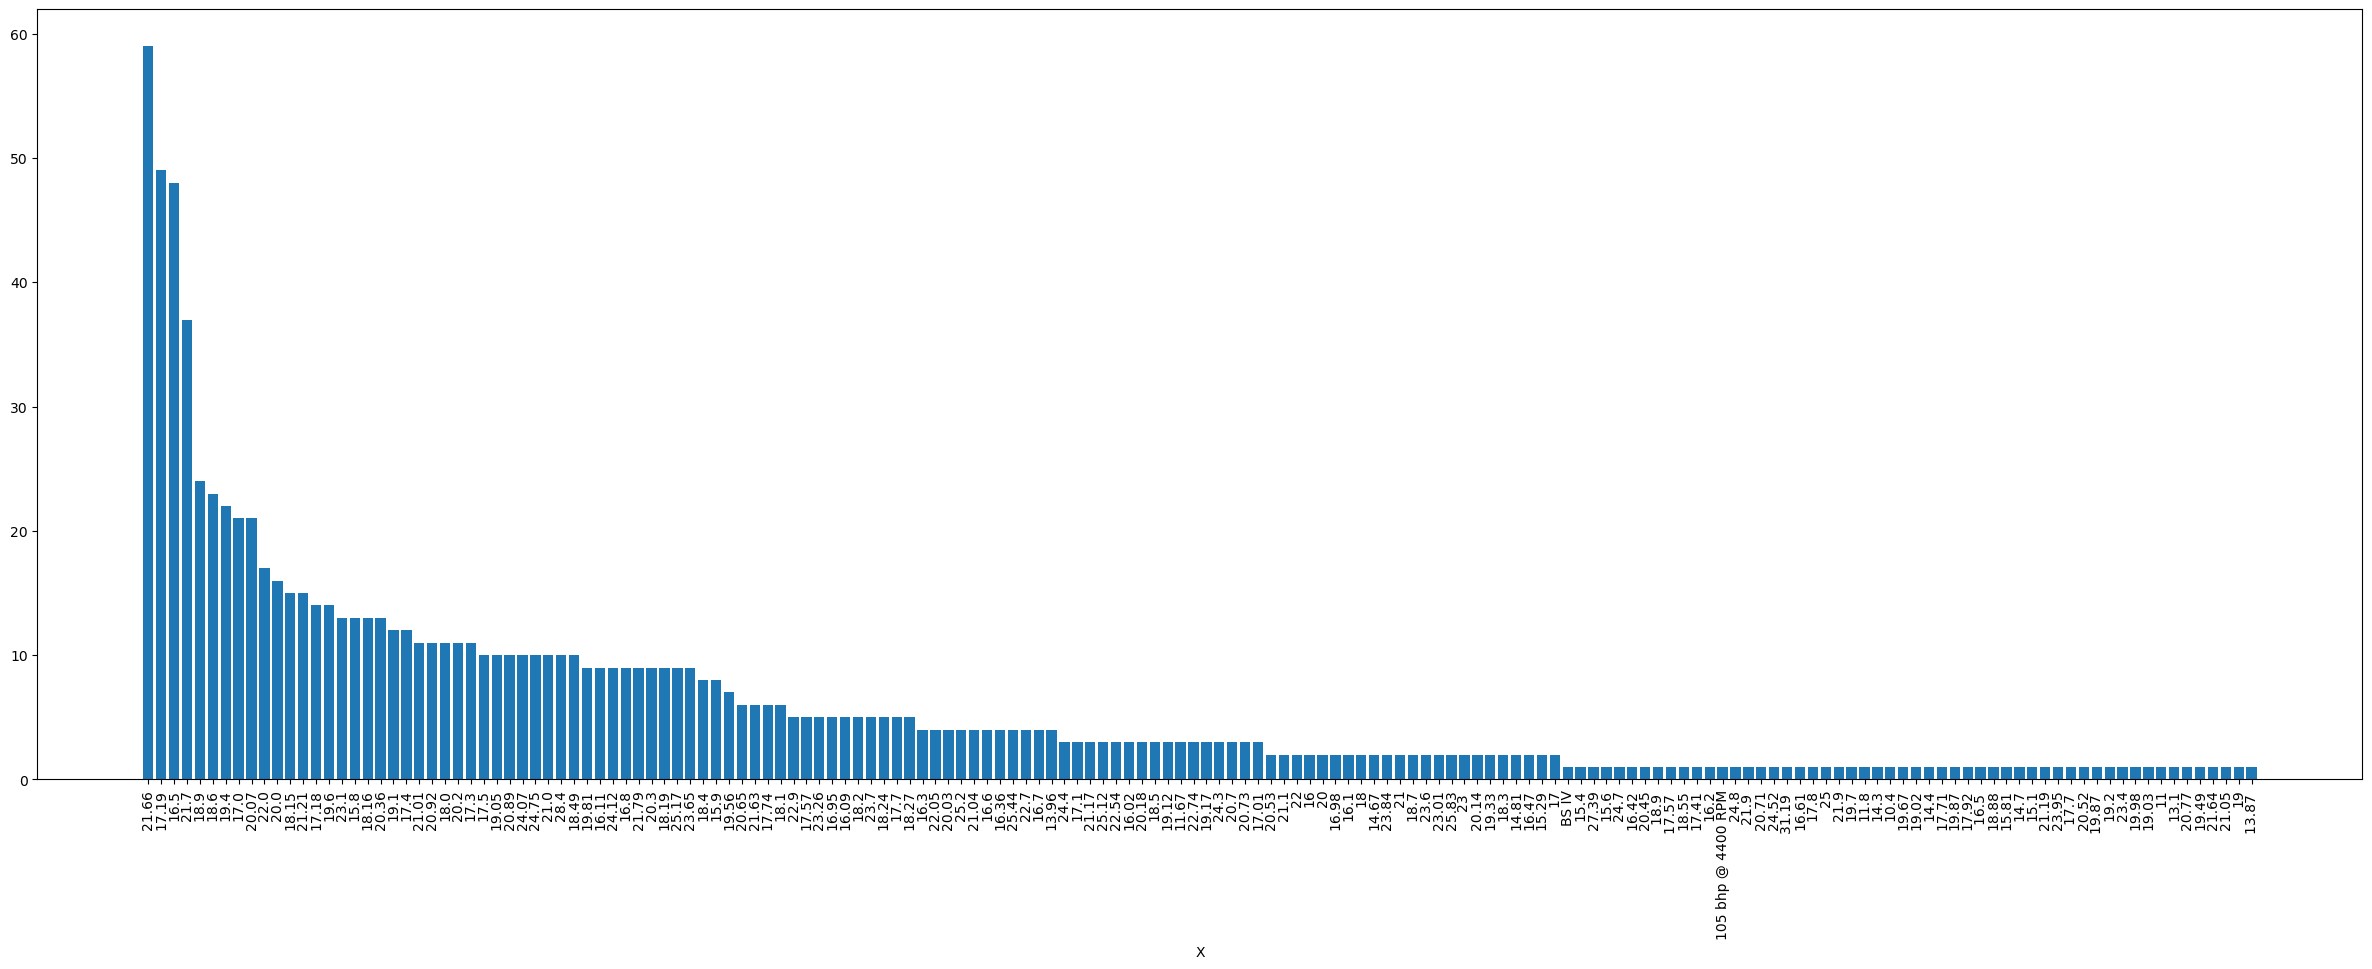

In [95]:
# We explore the different Mileage(kmpl) values to see if there are inconsistent values
plt.figure(figsize=(30,10))
plt.bar(cars["Mileage(kmpl)"].unique(), cars["Mileage(kmpl)"].value_counts())
plt.xticks(rotation = 90)
plt.xlabel("X")

##### After doing this exploration, we see that "BS IV" and "105 bhp @ 4400 RPM" are errors, as the value in Mileage(kmpl) should be numeric. So, we will remove those records

In [96]:
cars.drop(cars[cars["Mileage(kmpl)"] == "BS IV"].index, inplace = True, axis = 0)
cars.drop(cars[cars["Mileage(kmpl)"] == "105 bhp @ 4400 RPM"].index, inplace = True, axis = 0)

In [97]:
# Converting Mileage(kmpl) into numeric
cars["Mileage(kmpl)"] = cars["Mileage(kmpl)"].astype("float64")

In [98]:
cars["Mileage(kmpl)"].dtypes

dtype('float64')

In [99]:
# Converting Price into numeric
cars["Price"] = cars["Price"].astype("float64")

In [100]:
# Rechecking the data types to make sure all the columns have a relevant DataType
cars.dtypes

Car_Name                  object
Make                      object
Model                     object
Make_Year                  int64
Color                     object
Body_Type                 object
Mileage_Run              float64
No_of_Owners              object
Seating_Capacity           int64
Fuel_Type                 object
Fuel_Tank_Capacity(L)      int64
Engine_Type               object
CC_Displacement            int64
Transmission              object
Transmission_Type         object
Power(BHP)               float64
Torque(Nm)               float64
Mileage(kmpl)            float64
Emission                  object
Price                    float64
dtype: object

In [101]:
# Checking for null values - 
cars.isnull().sum()

Car_Name                 0
Make                     0
Model                    0
Make_Year                0
Color                    0
Body_Type                0
Mileage_Run              0
No_of_Owners             0
Seating_Capacity         0
Fuel_Type                0
Fuel_Tank_Capacity(L)    0
Engine_Type              0
CC_Displacement          0
Transmission             0
Transmission_Type        0
Power(BHP)               0
Torque(Nm)               0
Mileage(kmpl)            0
Emission                 0
Price                    0
dtype: int64

##### There are no null values in the dataset

In [102]:
# To dive further into the exploration, we see the number of values for each category in different columns.

for i in cars.columns:
    print(i)
    print(cars[i].value_counts())
    print("-------------------------------------------")


Car_Name
MG Motors Hector 2.0 Sharp                         24
Toyota Yaris [2018-2021] VX CVT                    16
Hyundai Elite i20 [2014-2018] Sportz 1.2           13
Ford Figo [2019-2021] Titanium Diesel              13
Hyundai Creta [2015-2018] 1.6 SX Plus Auto         12
                                                   ..
Honda Brio [2011-2016] S MT                         1
Honda Amaze 1.2 V CVT Petrol                        1
Ford EcoSport [2013-2015] Titanium 1.5L Ti-VCT      1
Maruti Suzuki Ciaz Zeta AT Petrol                   1
Ford Freestyle [2020-2021] Flair Edition Diesel     1
Name: Car_Name, Length: 374, dtype: int64
-------------------------------------------
Make
Hyundai          305
Maruti Suzuki    291
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Nissan             4
Jeep               4
Skoda       

##### Now we will remove the categorical variables that make the model more complex. Variables like Car_Name, Make, Model, Color, Engine_Type have a lot of categories and hence, it might be difficult to train the model with so many dummy variables. Sure, these variables might also affect the price, but they can be picked up when using some other machine learning technique.

In [103]:
cars.drop(columns = ["Car_Name", "Make", "Model", "Color", "Engine_Type"], inplace = True)

In [104]:
cars

,Make_Year,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,2017,sedan,44611.000,1st,5,diesel,45,1498,7-Speed,Automatic,109.000,250.000,21.660,BS IV,657000.000
1,2016,crossover,20305.000,1st,5,petrol,45,1197,5-Speed,Manual,82.000,115.000,17.190,BS V,682000.000
2,2019,suv,29540.000,2nd,5,petrol,40,1199,5-Speed,Manual,88.500,110.000,16.500,BS IV,793000.000
3,2017,hatchback,35680.000,1st,5,petrol,28,999,5-Speed,Manual,67.000,91.000,21.700,BS IV,414000.000
4,2017,hatchback,25126.000,1st,5,petrol,43,1197,5-Speed,Manual,81.860,113.750,18.900,BS V,515000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2018,sedan,23869.000,1st,5,petrol,43,1591,6-Speed,Automatic,121.000,158.000,17.400,BS V,956000.000
972,2019,sedan,14831.000,1st,5,petrol,43,1591,6-Speed,Automatic,121.000,158.000,17.400,BS V,1027000.000
973,2014,sedan,52846.000,1st,5,petrol,43,1591,4-Speed,Automatic,121.000,158.000,17.010,BS III,736000.000
974,2020,crossover,28335.000,2nd,5,diesel,42,1499,5-Speed,Automatic,98.960,215.000,18.500,BS V,749000.000


##### Exploring Categorical Variables and how they affect the price.

In [105]:
cars.select_dtypes(include = ["object"]).columns

Index(['Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Emission'],
      dtype='object')

In [106]:
# Now we define a function to create a boxplot that shows Price variation for different categorical variables.
def boxplot(df):
    for i in [i for i in cars.select_dtypes(include = ["object"]).columns]:
        fig, ax = plt.subplots(figsize = (6,3))
        sns.boxplot(x = df.iloc[:,-1], y= cars[i])
        ax.set_title("Variation between Price and {}".format(i), size = 10, color = "blue")
        ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.xaxis.get_major_formatter().set_scientific(False)
        ax.xaxis.get_major_formatter().set_useOffset(False)


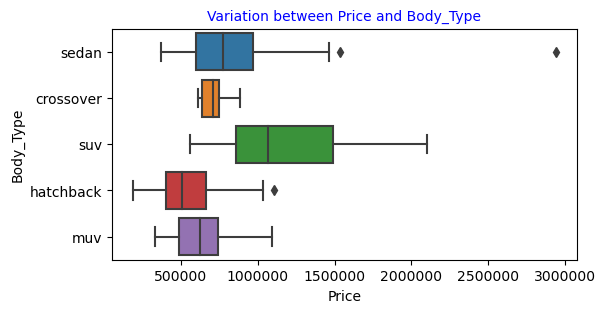

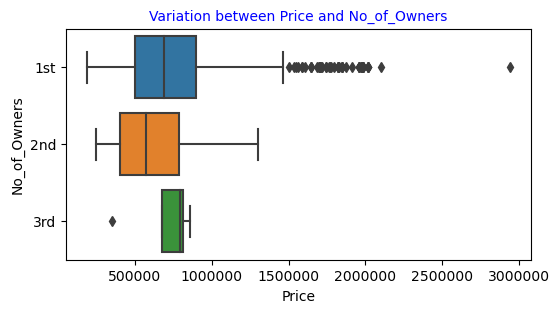

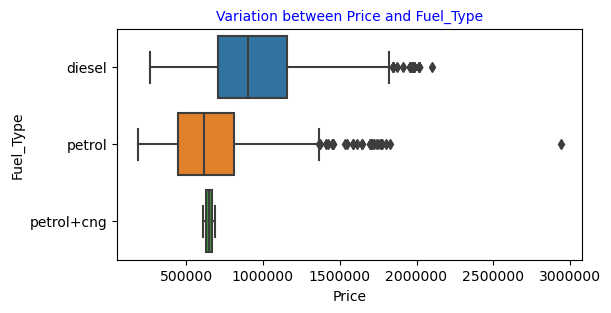

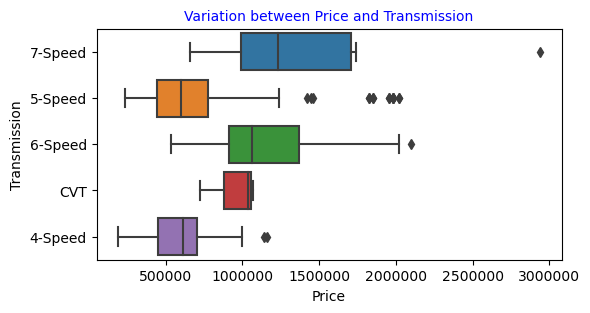

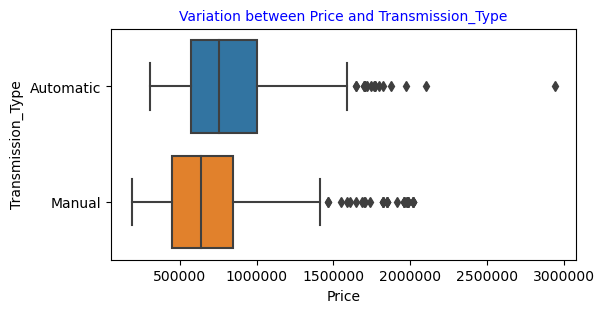

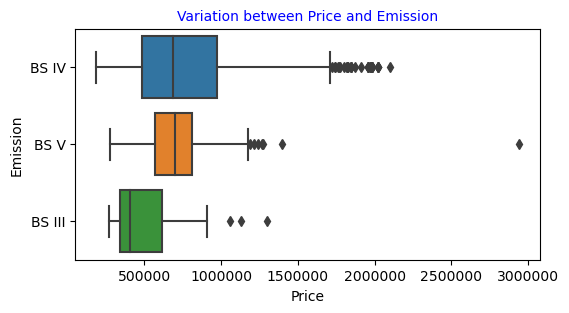

In [107]:
boxplot(cars)

#### Insights
 - SUVs have the maximum median price and hatchbacks have the lowest median price.

 - The price of used cars with 3 past owners is the maximum. Ideally this should not be true, as older the car, lesser would be the price. This could be because the dataset might have only high end cars with 3 past owners, thereby raising its price.

 - Diesel cars are the costliest of the three fuel types - diesel, petrol and petrol+cng.
 
 - The median price of cars with a 7-Speed transmission is the highest and those with 4-Speed transmission is the lowest, which makes sense.

 - Automatic cars are a little pricey than those with a manual transmission.

 - In India cars have emission standards based on the level of pollution they cause. These stages are graded as BS I, BS II, BS III, BS IV, BS V, and so on. Also, it makes sense from the visualisation that cars having BS V standard have the highest price.


In [108]:
# Now we create a pivot table to find the mean Price for different categories

def pivot_table(df):
    for i in [i for i in cars.select_dtypes(include = ["object"]).columns]:
        print(df.pivot_table(
            ["Price"],
            [i],
            aggfunc = "mean",
        ).head(10))
        print("----------------------------------")

In [109]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pivot_table(cars)

                Price
Body_Type            
crossover  705095.238
hatchback  532603.734
muv        626421.053
sedan      811438.053
suv       1176495.146
----------------------------------
                  Price
No_of_Owners           
1st          765875.000
2nd          609947.712
3rd          698250.000
----------------------------------
                 Price
Fuel_Type             
diesel     1033340.426
petrol      671140.485
petrol+cng  649000.000
----------------------------------
                   Price
Transmission            
4-Speed       608692.308
5-Speed       637321.716
6-Speed      1168497.041
7-Speed      1348625.000
CVT           944666.667
----------------------------------
                       Price
Transmission_Type           
Automatic         845370.229
Manual            702646.976
----------------------------------
              Price
Emission           
BS III   490414.634
BS IV    793416.667
BS V     707346.535
----------------------------------


This is basically a numerical form of the boxplot but with mean price for different categories

In [110]:
# To explore more, we create a function that shows a count of values for different categories

def countplot(df):
    for i in [i for i in cars.select_dtypes(include = ["object"]).columns]:
        fig, ax = plt.subplots(figsize = (6,4))
        sns.countplot(df[i], data = df)

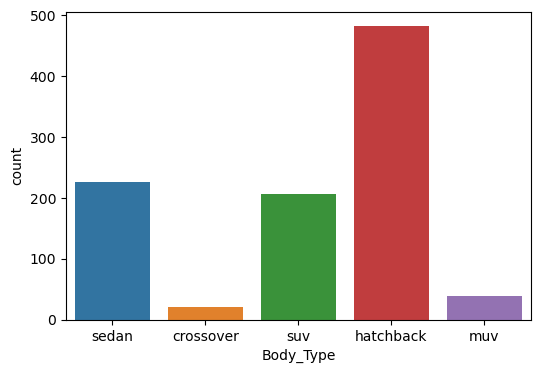

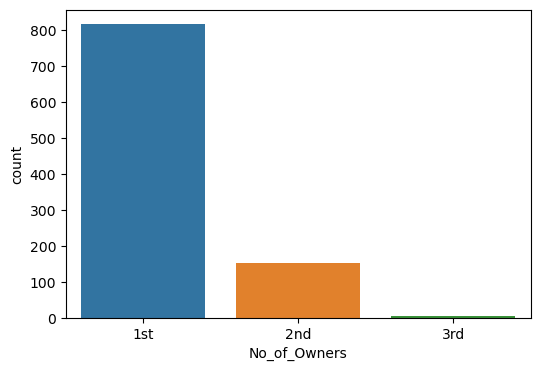

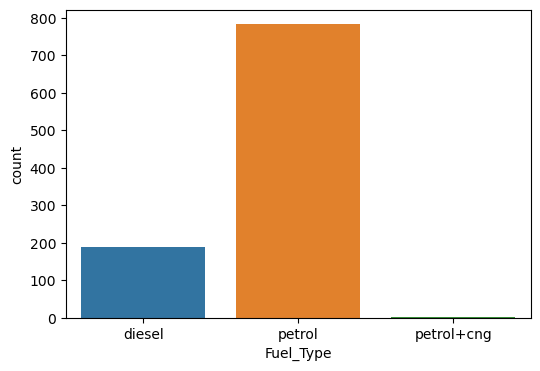

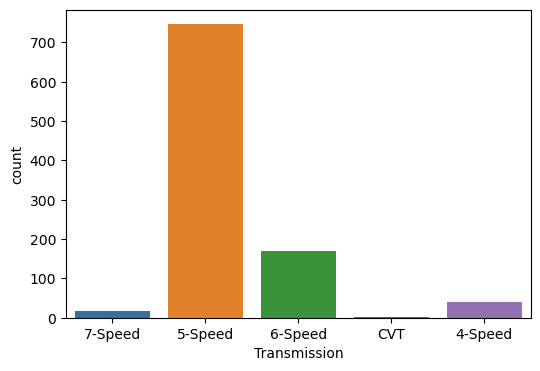

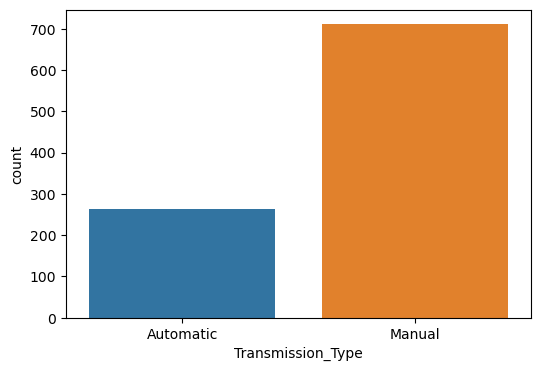

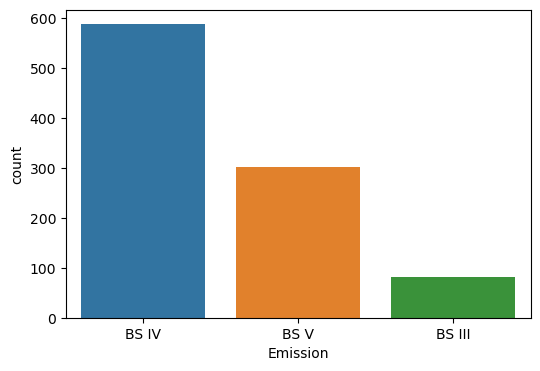

In [111]:
import warnings
warnings.filterwarnings('ignore')
countplot(cars)

This visualization gives us more information about our dataset. By looking at these graphs we can conclude how many datapoints do we have for each category.

### Exploring Numerical Variables and how they affect the price

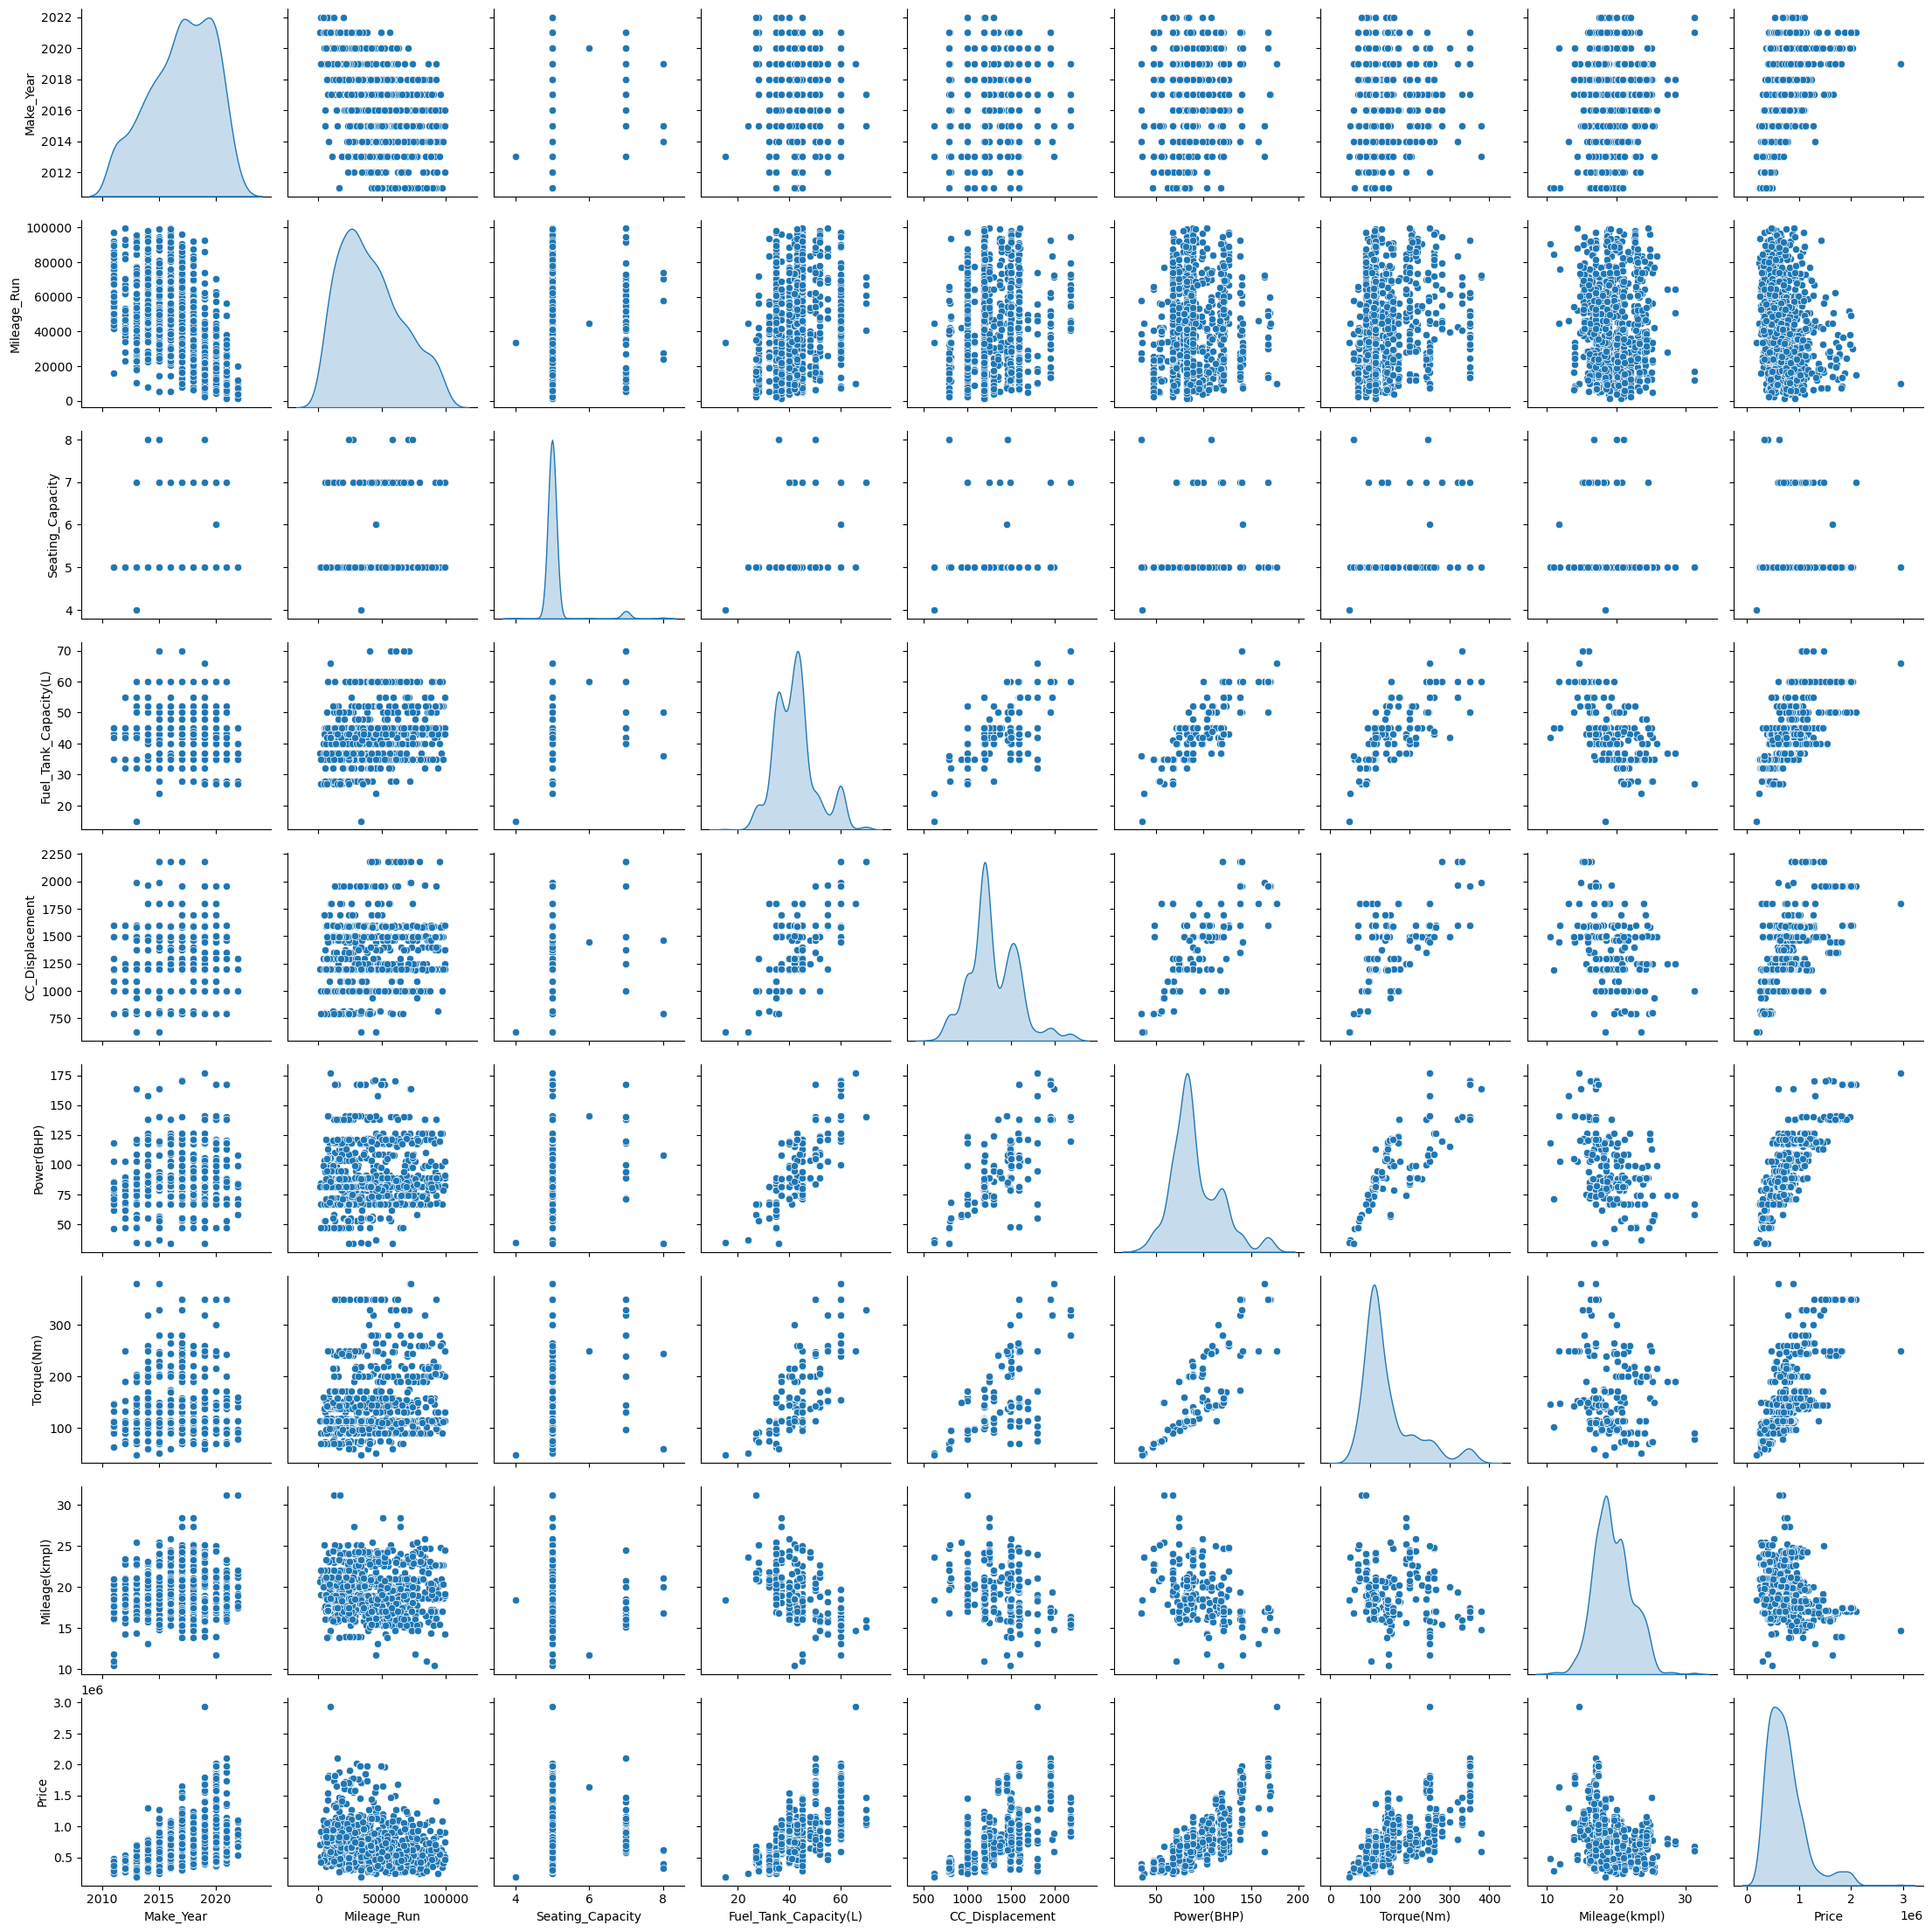

In [33]:
sns.pairplot(cars, diag_kind = "kde")

# This pairplot shows the distribution of different numeric variables with each other. This is a good way to see how one
# variable is affected by the other.

Now, we create histograms of the numerical features to see how they are distributed. 
This would be beneficial to see if the distribution is skewed and if there are any outliers.

array([[<AxesSubplot:title={'center':'Make_Year'}>,
        <AxesSubplot:title={'center':'Mileage_Run'}>,
        <AxesSubplot:title={'center':'Seating_Capacity'}>],
       [<AxesSubplot:title={'center':'Fuel_Tank_Capacity(L)'}>,
        <AxesSubplot:title={'center':'CC_Displacement'}>,
        <AxesSubplot:title={'center':'Power(BHP)'}>],
       [<AxesSubplot:title={'center':'Torque(Nm)'}>,
        <AxesSubplot:title={'center':'Mileage(kmpl)'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

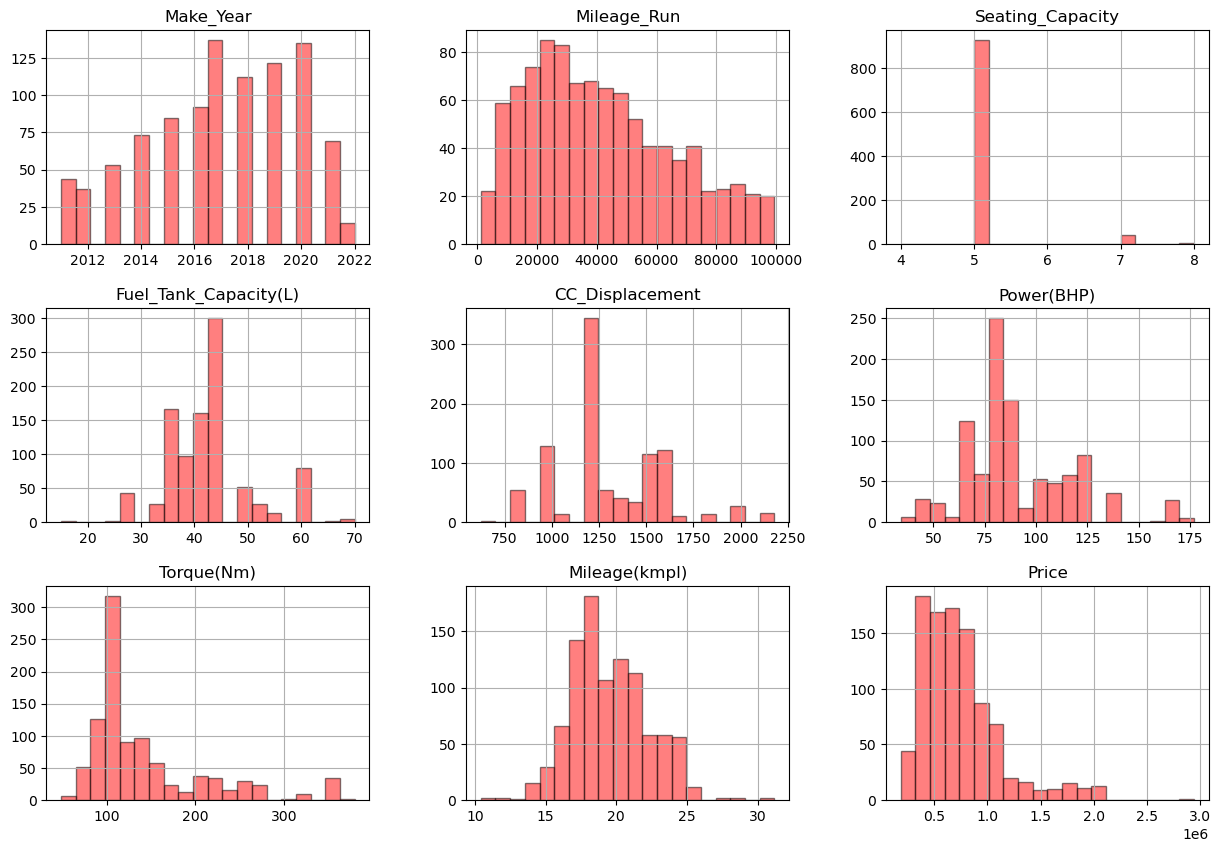

In [112]:
cars.hist(bins=20, 
         figsize = (15,10), color = "red", alpha = 0.5, edgecolor = "black")

 - Mileage Run and Price have a right skewed distribution. 
 - The distribution of Mileage(kmpl) and Fuel Tank Capacity is close to normal distribution. 


*Creating a correlation matrix to see the correlation between different independent features and between the dependent feature (Price) and other features.*

Correlation is a measure that is used to determine the extent to which 2 variables are linearly related to each other. A positive value of correlation indicates that as one variable increases, the other also increases and a negative correlation indicates that as one variable decreases, the other increase or vice versa

In [113]:
corrmat = cars.corr()
corrmat.columns

Index(['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Fuel_Tank_Capacity(L)',
       'CC_Displacement', 'Power(BHP)', 'Torque(Nm)', 'Mileage(kmpl)',
       'Price'],
      dtype='object')

<AxesSubplot:>

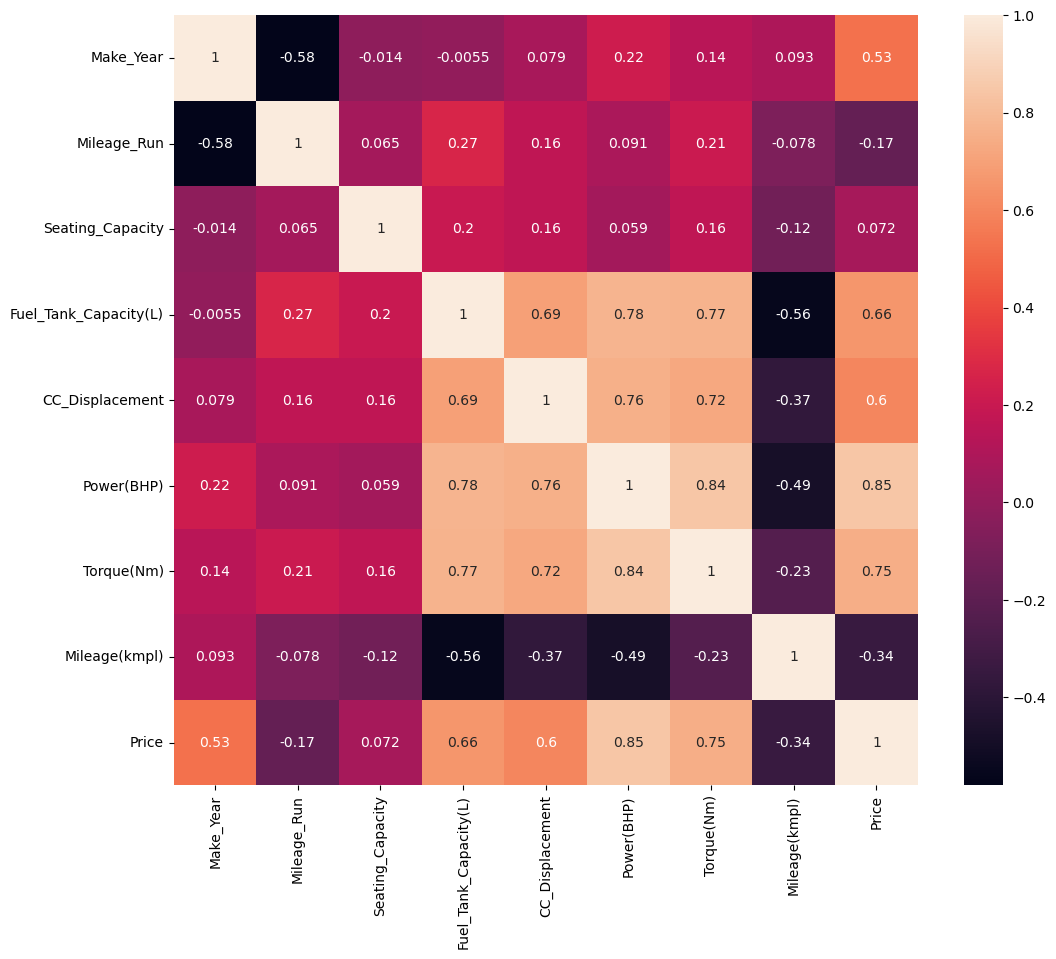

In [114]:
# Creating a heatmap to visually explore different correlated features

fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corrmat, annot = True)

This heatmap gives a clear indication that boxes having a yellowish shade show a positive correlation between features and those having a darker shade show a negative correlation. The independent features that are highly correlated to each other might lead to multicollinearity and hence, would affect the accuracy of the model. So, to avoid this we need to remove one of the two highly correlated independent features. But to get an exact idea of what features to keep, we need to define a threshold correlation and features having correlation above that should be removed. The function below does exactly this-

In [115]:
# Removing highly correlated features

def correlation(data, threshold):
    column_corr = set()
    corrmat = cars.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                column = corrmat.columns[i]
                column_corr.add(column)
    return column_corr
                

In [116]:
cars_x = cars.iloc[:,:-1]

In [117]:
correlation(cars_x, 0.8)

{'Price', 'Torque(Nm)'}

Since no two features are very highly correlated, we will use another apprroach called the mutual information to find if any feature is irrelavant.

Mutual Information between two variables is a non-negative value which indicates the dependency between the variables. It is equal to 0 if both variables are completely independent. 

It basically measures the amount of information we can about about one variable from the other. 

So, here we will measure the mutual information between the dependent variables and the indepedent variable (Price).

In [118]:
from sklearn.feature_selection import mutual_info_classif

In [119]:
info = mutual_info_classif(cars_x.select_dtypes(include = ["int64", "float64"]), cars["Price"])

In [120]:
info_data = pd.Series(info, index = cars_x.select_dtypes(include = ["int64", "float64"]).columns)
info_data.sort_values(ascending = False)

Seating_Capacity        1.713
Fuel_Tank_Capacity(L)   1.427
Torque(Nm)              1.370
Power(BHP)              1.308
Mileage(kmpl)           1.224
Make_Year               1.202
Mileage_Run             1.130
CC_Displacement         0.668
dtype: float64

Out of all the other features, CC_Displacement has the least mutual information. So, it should be okay to remove it.

In [121]:
cars.drop(columns = ["CC_Displacement"], inplace = True)

In [46]:
# Now, we create a function to plot a regression plot against different numerical features and price

def regplot(df):
    for i in [i for i in cars.select_dtypes(include = ["int64", "float64"]).columns]:
        fig, ax = plt.subplots(figsize = (6,4))
        sns.regplot(y = df.Price, x= df[i])
        ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.xaxis.get_major_formatter().set_scientific(False)
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.yaxis.get_major_formatter().set_scientific(False)
        ax.yaxis.get_major_formatter().set_useOffset(False)


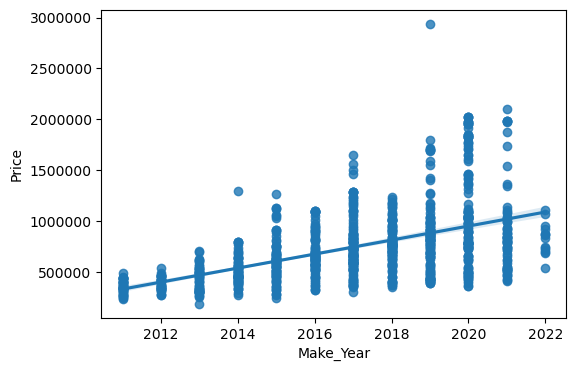

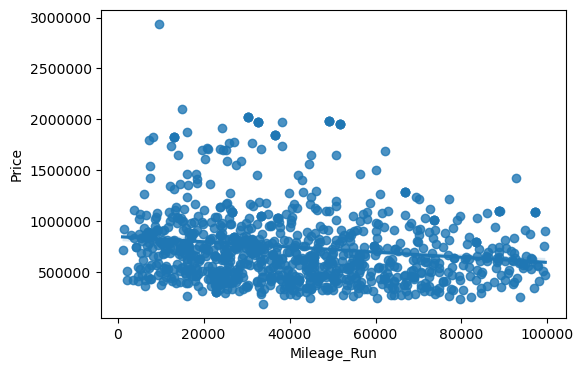

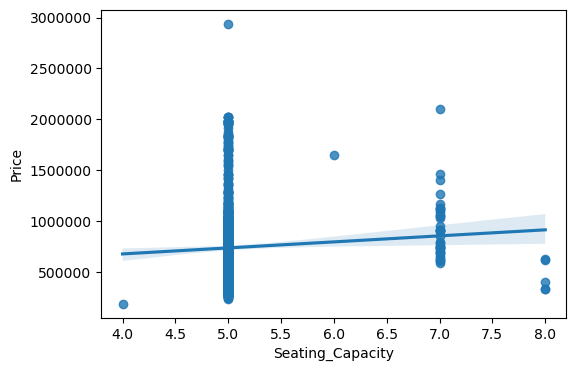

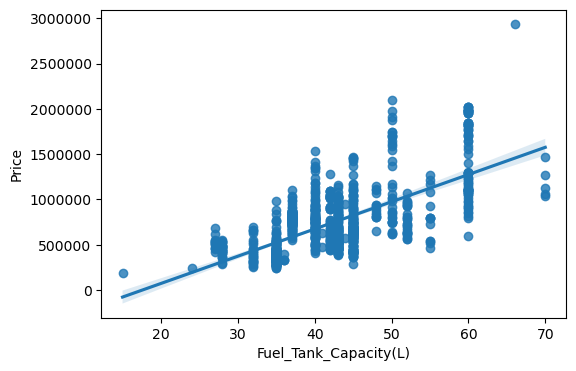

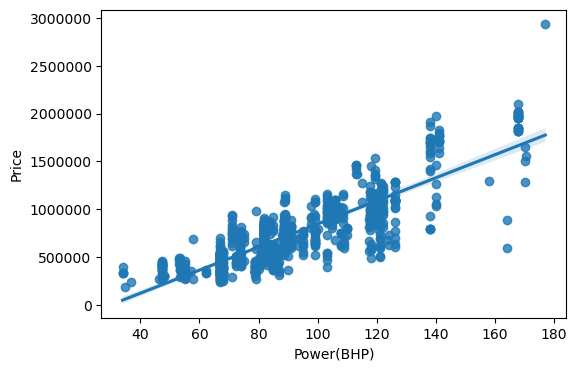

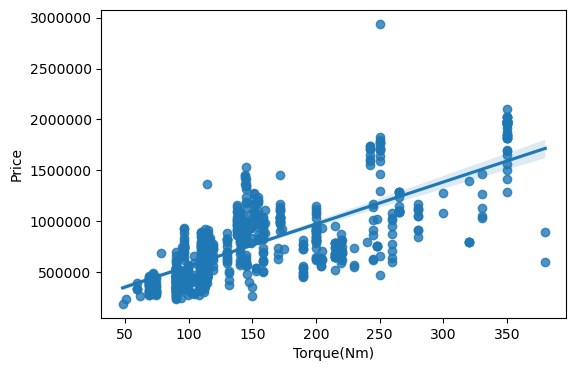

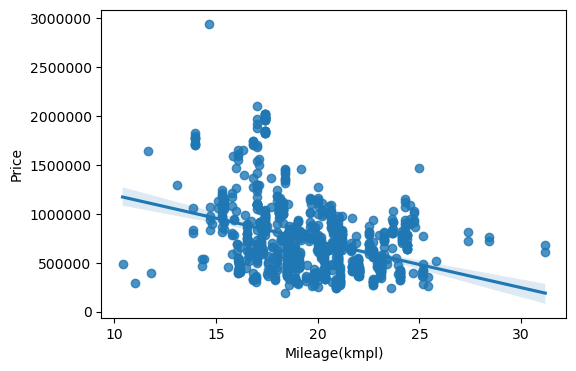

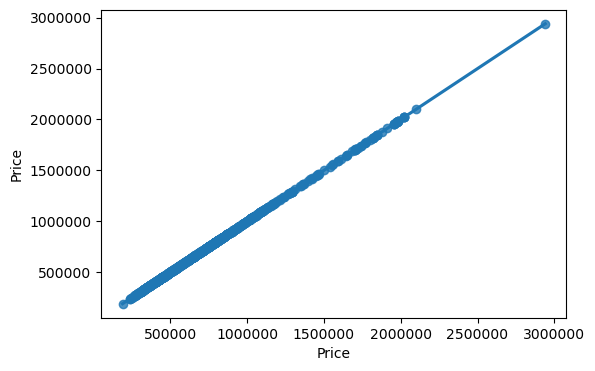

In [47]:
warnings.filterwarnings('ignore')
regplot(cars)

##### Insights

 - Cars with the latest make year have the highest price.
 - As the mileage run increases, the price decreases. 
 - We do not see a very high correlation between Price and Seating Capacity, but it is seen that as seating capacity increases, the price also increases.
 - The price increases with Power, Torque and Fuel Tank Capacity.
 - There is a negative relation between Price and Mileage(kmpl). 


In [122]:
# The following fucntion is used to create a distplot (a combination of histogram and the probability 
# distribution of the dataset). 

def distplot(df):
    for i in [i for i in cars.select_dtypes(include = ["int64", "float64"]).columns]:
        fig, ax = plt.subplots(figsize = (6,4))
        sns.distplot(df[i], kde = True)
        ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.xaxis.get_major_formatter().set_scientific(False)
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
        ax.yaxis.get_major_formatter().set_scientific(False)
        ax.yaxis.get_major_formatter().set_useOffset(False)

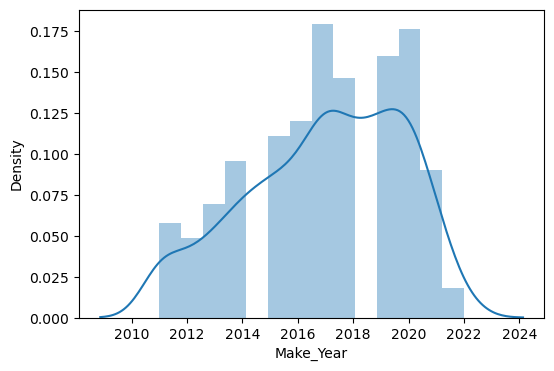

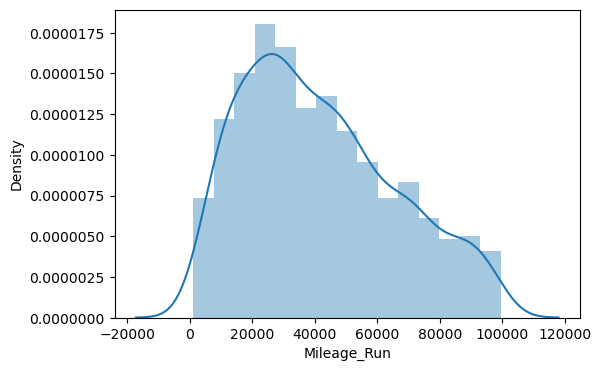

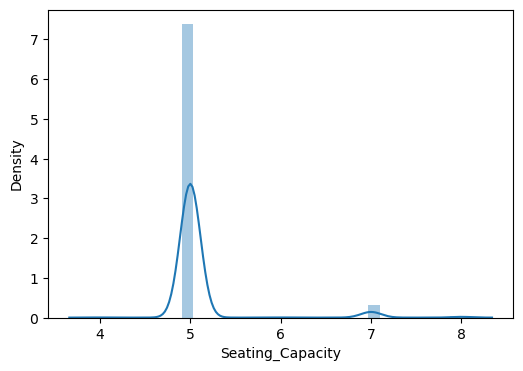

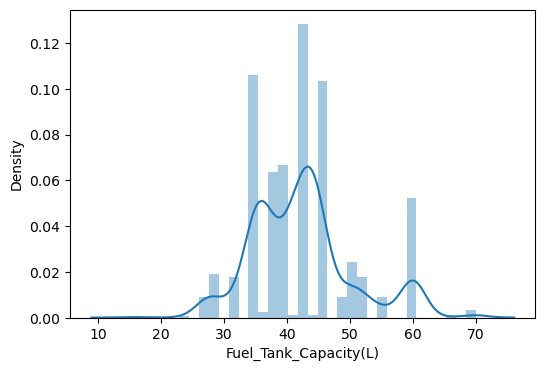

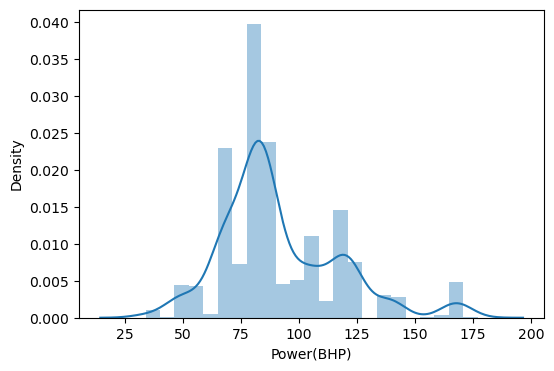

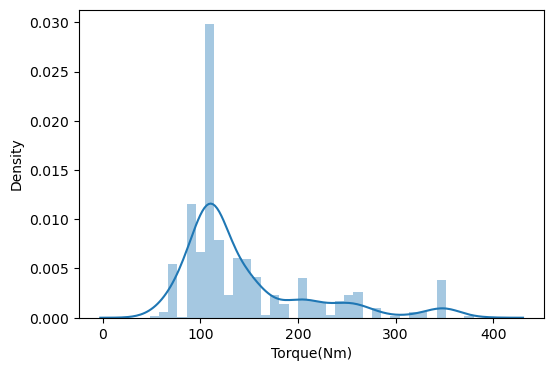

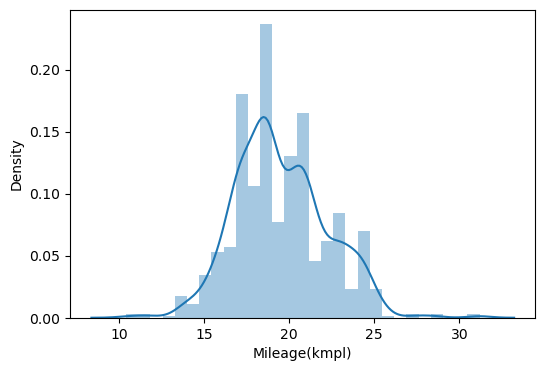

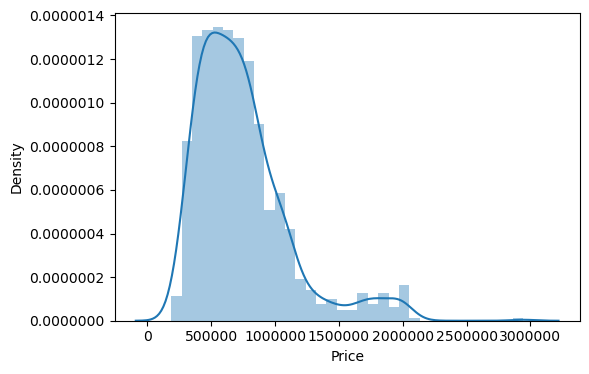

In [123]:
warnings.filterwarnings('ignore')
distplot(cars)

In [124]:
cars.No_of_Owners.value_counts()

1st    816
2nd    153
3rd      4
Name: No_of_Owners, dtype: int64

In [125]:
cars.groupby("No_of_Owners")["Price"].mean()

No_of_Owners
1st   765875.000
2nd   609947.712
3rd   698250.000
Name: Price, dtype: float64

Now we will rank the number of owners as - 3rd = 1, 2nd = 1, 1st = 3. This is because the price of a car with only one owner before selling would naturally be more than those that were owned by more people or resold multiple times and so, it has been given higher number


In [126]:
owners = {"1st": 3, "2nd":2, "3rd":1}
cars["No_of_Owners"] = cars["No_of_Owners"].map(owners)

In [127]:
cars.Emission.value_counts()

BS IV     588
BS V      303
BS III     82
Name: Emission, dtype: int64

In [128]:
cars.groupby("Emission")["Price"].mean()

Emission
BS III   490414.634
BS IV    793416.667
BS V     707346.535
Name: Price, dtype: float64

Similarly, for Emission level, we will rank the emission levels as - BS III = 1, BS IV = 2, BS V = 3. This is because the BS V is the latest emission level and a car having this will have lesser emission, hence price of the car would be more, as compared to those having lower levels. Hence, BS V has been assigned the highest value

In [129]:
emission = {"BS III": 1, "BS IV":2, "BS V":3}
cars["Emission"] = cars["Emission"].map(emission)

### MODEL BUILDING

In [130]:
# Importing libraries

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [131]:
cars.columns

Index(['Make_Year', 'Body_Type', 'Mileage_Run', 'No_of_Owners',
       'Seating_Capacity', 'Fuel_Type', 'Fuel_Tank_Capacity(L)',
       'Transmission', 'Transmission_Type', 'Power(BHP)', 'Torque(Nm)',
       'Mileage(kmpl)', 'Emission', 'Price'],
      dtype='object')

In [132]:
cars

,Make_Year,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,2017,sedan,44611.000,3,5,diesel,45,7-Speed,Automatic,109.000,250.000,21.660,2,657000.000
1,2016,crossover,20305.000,3,5,petrol,45,5-Speed,Manual,82.000,115.000,17.190,3,682000.000
2,2019,suv,29540.000,2,5,petrol,40,5-Speed,Manual,88.500,110.000,16.500,2,793000.000
3,2017,hatchback,35680.000,3,5,petrol,28,5-Speed,Manual,67.000,91.000,21.700,2,414000.000
4,2017,hatchback,25126.000,3,5,petrol,43,5-Speed,Manual,81.860,113.750,18.900,3,515000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2018,sedan,23869.000,3,5,petrol,43,6-Speed,Automatic,121.000,158.000,17.400,3,956000.000
972,2019,sedan,14831.000,3,5,petrol,43,6-Speed,Automatic,121.000,158.000,17.400,3,1027000.000
973,2014,sedan,52846.000,3,5,petrol,43,4-Speed,Automatic,121.000,158.000,17.010,1,736000.000
974,2020,crossover,28335.000,2,5,diesel,42,5-Speed,Automatic,98.960,215.000,18.500,3,749000.000


Since, regression equation cannot take categorical values, we need to have numerical encoding for the different categories. To do this we need to create dummy variables.

In [133]:
# Creating dummy variables
cars = pd.get_dummies(cars, drop_first = True)

In [134]:
cars.columns

Index(['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity',
       'Fuel_Tank_Capacity(L)', 'Power(BHP)', 'Torque(Nm)', 'Mileage(kmpl)',
       'Emission', 'Price', 'Body_Type_hatchback', 'Body_Type_muv',
       'Body_Type_sedan', 'Body_Type_suv', 'Fuel_Type_petrol',
       'Fuel_Type_petrol+cng', 'Transmission_5-Speed', 'Transmission_6-Speed',
       'Transmission_7-Speed', 'Transmission_CVT', 'Transmission_Type_Manual'],
      dtype='object')

In [135]:
# Dividing the dataset into X (Independent variables) and Y(dependent variable)

X = cars.drop(columns = ["Price"]).values
Y = cars["Price"].values

In [136]:
X.shape

(973, 20)

In [137]:
# Dividing X and Y into training and testing set.
# The model will be trained on the training set and the accuracy will be checked using the testing set.
# Here, we are splitting the dataset where 20% forms the testing set and 80% forms the training set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

#### Standardization 
In some cases the range of values of different independent features can be quite different. Having varied and incomparable range can affect the accuracy of the model and can also make it slow. Thus, it is adivasable to bring the values of independent variables on a similar scale. This can be done by standardizing the variable. 
The dataset can be standardized using the following formula - 

Z = (X-mean)/SD

where SD - Standard Deviation

A standardized distribution has a mean 0 and SD of 1.

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [139]:
# Fitting and transforming the X_train and X_test to standardize all values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
X_train

array([[ 0.36, -0.21, -2.21, ..., -0.14, -0.05, -1.63],
       [ 0.72, -0.93, -2.21, ..., -0.14, -0.05,  0.61],
       [-2.12,  1.71, -2.21, ..., -0.14, -0.05,  0.61],
       ...,
       [-1.77,  0.05, -2.21, ..., -0.14, -0.05, -1.63],
       [ 1.07, -1.15,  0.43, ..., -0.14, -0.05,  0.61],
       [ 0.72, -0.98,  0.43, ..., -0.14, -0.05,  0.61]])

We now see standardized values of X_train

In [141]:
# Creating the Linear model and fitting(training) it on X_train and Y_train

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

##### Predicting the Result

In [142]:
# Predicting X_test values using our model 
Y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((Y_pred.reshape(len(Y_pred), 1),Y_test.reshape(len(Y_test), 1)), 1 ))


The array below shows the predicted values and the actual values

In [143]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(np.concatenate((Y_pred.reshape(len(Y_pred), 1),Y_test.reshape(len(Y_test), 1)), 1 ), columns = ["Predicted", "Actual"])

,Predicted,Actual
0,715873.812,812000.000
1,1602705.854,1770000.000
2,200181.348,330000.000
3,942127.356,806000.000
4,1057736.024,956000.000
...,...,...
190,536711.468,545000.000
191,664953.163,699000.000
192,422826.559,490000.000
193,575690.714,551000.000


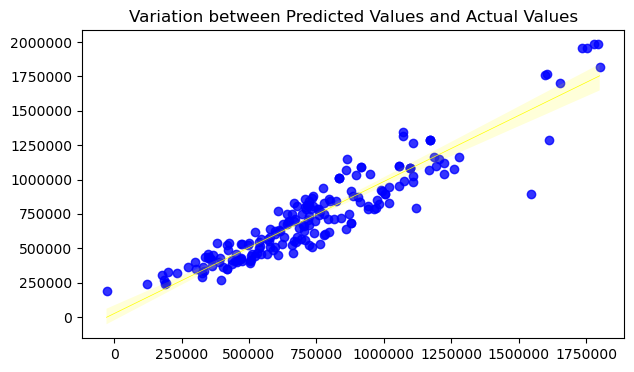

In [145]:
# A regression plot showing predicted values on the X-axis and actual values on the Y-axis

warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize = (7,4))
sns.regplot(Y_pred, Y_test, scatter_kws={"color":"b", "marker": "d"}, line_kws={"linewidth":0.5, "color":"yellow"} )
ax.set_title("Variation between Predicted Values and Actual Values")
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


#### Reviewing performance of the model

 - The R2 value is used to determine the percentage of variation in one variable that can be explained by other variables. It is basically used to test the quality of the model. It shows how well the model predicts the outcome and is sometimes referred to as goodness of fit. The value of R2 is between 0 and 1. 
 
 - The Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of forecasts.
 - The Mean Squared Error (MSE) measures the average of squares of errors in a set of forecasts.
 - Root Mean Squared Error (RMSE) is the square root of MSE.


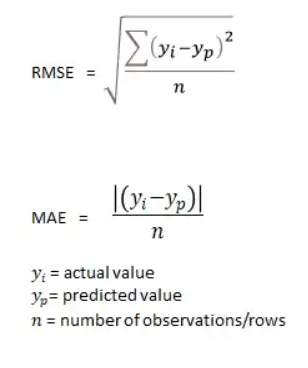

In [72]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score

score=r2_score(Y_test,Y_pred)
print("r2 score is: ",round(score,4))
print("Mean Squared Error is: ", round(mean_squared_error(Y_test,Y_pred),2))
print("Root Mean Squared Error is: ",round(np.sqrt(mean_squared_error(Y_test,Y_pred)),2))
print('Mean Absolute Error is: ', round(metrics.mean_absolute_error(Y_test, Y_pred),2))

r2 score is:  0.872
Mean Squared Error is:  15614206596.19
Root Mean Squared Error is:  124956.82
Mean Absolute Error is:  98474.81


In [74]:
def final_model():
    mk_yr = input("What is the make year?")
    mil_run = input("What is the mileage run?")
    owner = input("What is the number of owners?")
    seating = input("What is the seating capacity?")
    fuel_tank = input("What is the fuel tank capacity?")
    power = input("What is the power in BHP?")
    torque = input("What is the torque?")
    mil_kmpl = input("What is the mileage in kmpl?")
    emission = input("What is the emission type?")
    body_type = input("What is the body type?")
    fuel_type = input("What is the fuel type?")
    trans = input("What is the transmission?")
    trans_type = input("What is the transmission_type?")
    
    if owner == "1st":
        o1 = 3
    elif owner =="2nd":
        o1 = 2
    else:
        o1 = 1
    
    if emission == "BS III":
        e1 = 1
    elif emission == "BS IV":
        e1 = 2
    else: 
        e1 = 3
    
    if body_type == "hatchback":
        bt_ha = 1
        bt_mu = 0
        bt_se = 0
        bt_su = 0
    elif body_type == "muv":
        bt_ha = 0
        bt_mu = 1
        bt_se = 0
        bt_su = 0
    elif body_type == "sedan":
        bt_ha = 0
        bt_mu = 0
        bt_se = 1
        bt_su = 0
    elif body_type == "suv":
        bt_ha = 0
        bt_mu = 0
        bt_se = 0
        bt_su = 1
    else:
        bt_ha = 0
        bt_mu = 0
        bt_se = 0
        bt_su = 0
        
    if fuel_type == "diesel":
        ft_p = 0
        ft_c = 0
    elif fuel_type == "petrol":
        ft_p = 1
        ft_c = 0
    else:
        ft_p = 0
        ft_c = 1
    
    if trans == "4-Speed":
        t_5 = 0
        t_6 = 0
        t_7 = 0
        t_cvt = 0
        
    elif trans == "5-Speed":
        t_5 = 1
        t_6 = 0
        t_7 = 0
        t_cvt = 0
        
    elif trans == "6-Speed":
        t_5 = 0
        t_6 = 1
        t_7 = 0
        t_cvt = 0
        
    elif trans == "7-Speed":
        t_5 = 0
        t_6 = 0
        t_7 = 1
        t_cvt = 0
    else:
        t_5 = 0
        t_6 = 0
        t_7 = 0
        t_cvt = 1
    
    if trans == "Automatic":
        t_m = 0
    else:
        t_m = 1
    
    
    predicted_y = model.predict(scaler.transform([[mk_yr, mil_run, o1, seating, fuel_tank, power, torque, mil_kmpl, e1, bt_ha, bt_mu, bt_se, bt_su, ft_p,
                  ft_c, t_5, t_6, t_7, t_cvt, t_m]]))
    
    return print("The predicted price of the car is {}".format(round(predicted_y[0],2)))   

In [76]:
final_model()

What is the make year?2017
What is the mileage run?45000
What is the number of owners?1st
What is the seating capacity?5
What is the fuel tank capacity?45
What is the power in BHP?89
What is the torque?115
What is the mileage in kmpl?15.5
What is the emission type?BS V
What is the body type?sedan
What is the fuel type?petrol
What is the transmission?5-Speed
What is the transmission_type?Manual
The predicted price of the car is 695638.66


#### CONCLUSION
Overall, the model seems to be good, as it has an R2 value of 0.87. Further, we can explore other machine learning techniques that might make it easier to use the features that we discarded in the start and might have a better accuracy than this model.